# Audio analysis

The STIM module has some nice functions to do audio analysis. 
These are mainly in the audio_analysis.py folder and in plot_features.py.
Lets discover some of them:

In [1]:
from audio_analysis import *
from plot_features import *

First, for a given sound, lets get some information

In [2]:
file_name = "sounds/F11a1.wav"

In [3]:
#get sound duration
get_sound_duration(file_name)

1.8575963718820863

In [4]:
#get number of audio channels
get_nb_channels(file_name)

1

In [5]:
#mean RMS from audio file
get_rms_from_wav(file_name)

-30.711942748625827

## Formants

In [6]:
#get formants
help(formant_from_audio)

Help on function formant_from_audio in module audio_analysis:

formant_from_audio(audio_file, nb_formants)
    parameters:
            audio_file      : file to anlayse
            nb_formants : number of formants to compute and return
    
            This function returns an array of pandas data bases with 
            the formants inside (Frequency, Amplitude, Bandwith and Saliance).
    
            this function only works for mono files



In [7]:
formants = formant_from_audio(file_name, 5)

In [8]:
#we get 5 formants
len(formants)

5

In [9]:
#here is, for instance, formant 1
F1 = formants[0]
F1.head()

,Frequency,Amplitude,Bw,Saliance
0.001395,302.074860,0.012444,456.817139,0.0
0.002778,314.922028,0.020721,368.433868,0.0
0.004184,298.176971,0.024204,491.402679,0.0
0.005567,288.529602,0.030279,477.787811,0.0
0.006950,310.671387,0.034603,456.133026,0.0


In [10]:
import matplotlib.pylab as plt
%matplotlib inline

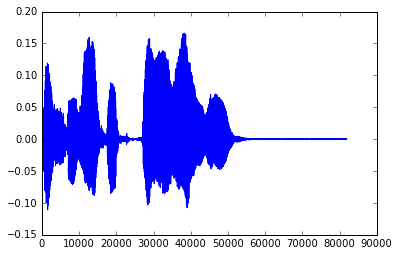

In [11]:
#waveform
sound_in, fs, enc = wavread(file_name)
plt.plot(sound_in)

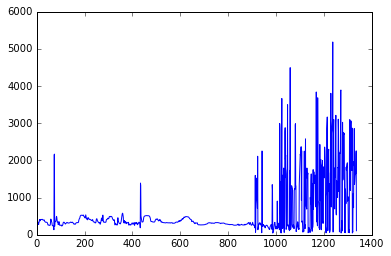

In [12]:
plt.plot(F1["Frequency"].values);

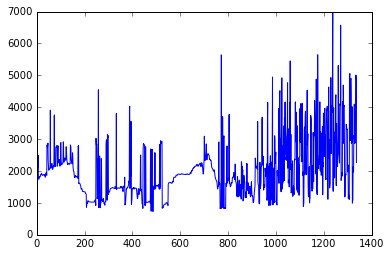

In [13]:
F2 = formants[1]
plt.plot(F2["Frequency"].values);

## Spectral centroid

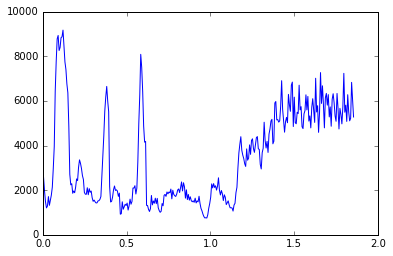

In [14]:
#spectral centroid
t, centroid_list = get_spectral_centroid_over_time(file_name)
plt.plot(t, centroid_list)

In [15]:
get_mean_spectral_centroid_when_sound(file_name)

2925.2834056096376

## RMS

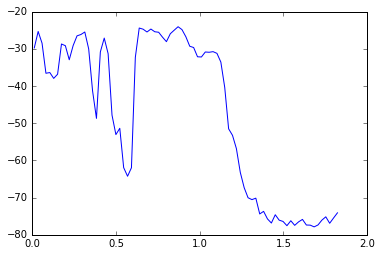

In [16]:
t, rms_list = get_RMS_over_time(file_name)
plt.plot(t, rms_list)

## Spectrum

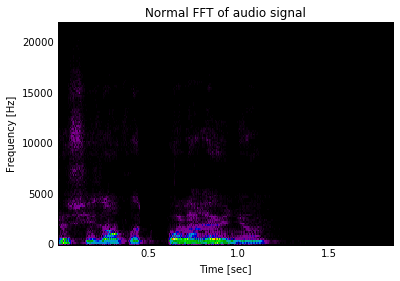

In [17]:
f, t, Sxx = get_spectrum(file_name, plot_spec=True)

In [18]:
#or also using this function:
help(plot_spectrogram)

Help on function plot_spectrogram in module plot_features:

plot_spectrogram(audio_file, window_size=2048, nfft=256, noverlap=255, plot_legends=True, interpolation='nearest', x_min='', x_max='', y_min='', y_max='', noise=0.01, save_pdf_with_name='', title='', xlog=False)
    parameters:
            audio_file                      : path to audio file to plot
            window_size             : window size to use
            nfft                            : nfft
            noverlap                        : number of samples of overlap
            plot_legends            : if True plot the axis legends
            interpolation           : matplotlib's interpolation
            x_min                           : min time value to plot 
            x_max                           : max time value to plot
            y_min                           : min freq value to plot
            x_max                           : max freq value to plot
            noise                           : 

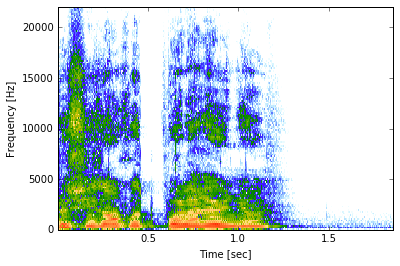

In [19]:
plot_spectrogram(file_name, window_size = 256, noise = 0.00001)

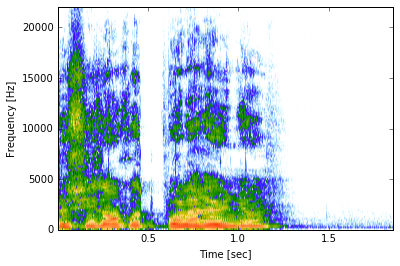

In [20]:
#with another matplotlib interpolation
#the noise parameter acts as a gate putting everything below in white
plot_spectrogram(file_name, window_size = 256, noise = 0.00001, interpolation="gaussian")

## Spectral Envelope

In [33]:
help(plot_mean_lpc_from_audio)

Help on function plot_mean_lpc_from_audio in module plot_features:

plot_mean_lpc_from_audio(audio_files, label=None, show=True, save_pdf_with_name='', destroy_analysis_after_plot=False, title='', figsize=(20, 10), dpi=80, nb_coefs=1024, lw=2, x_log=False, plot_legend=True, x_limit=(0, 22000))
    parameters:
            audio_files                             : Array with files to plot
            label                                           : curve label
            show                                            : show the plot
            save_pdf_with_name                      : save_pdf with the name in argument. the .pdf extension is not needed.
            destroy_analysis_after_plot : if set to True the analysis file created will be deleted after closing the plot window.
            nb_coefs                                        : Number of coeficients for the lpc analysis
            lw                                                      : Line width
            x_log   

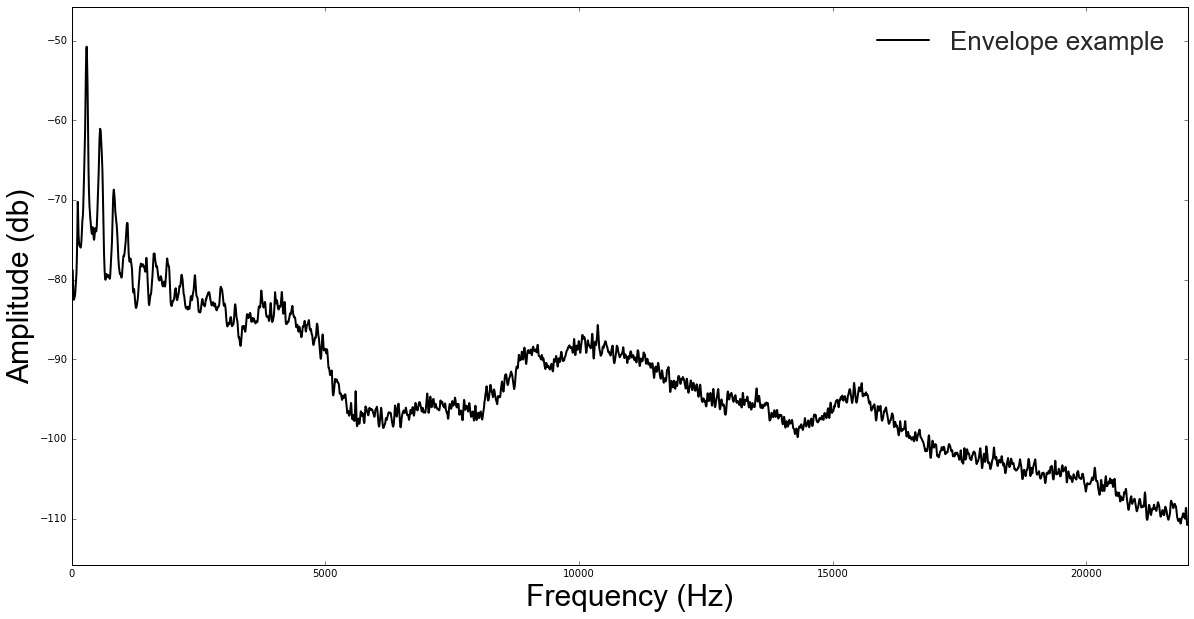

In [21]:
#Spectral envelopes
#LPC
file_name = "sounds/F11a1.wav" # "a" phoneme said by Audrey
plot_mean_lpc_from_audio(audio_files = [file_name], label = ["Envelope example"])

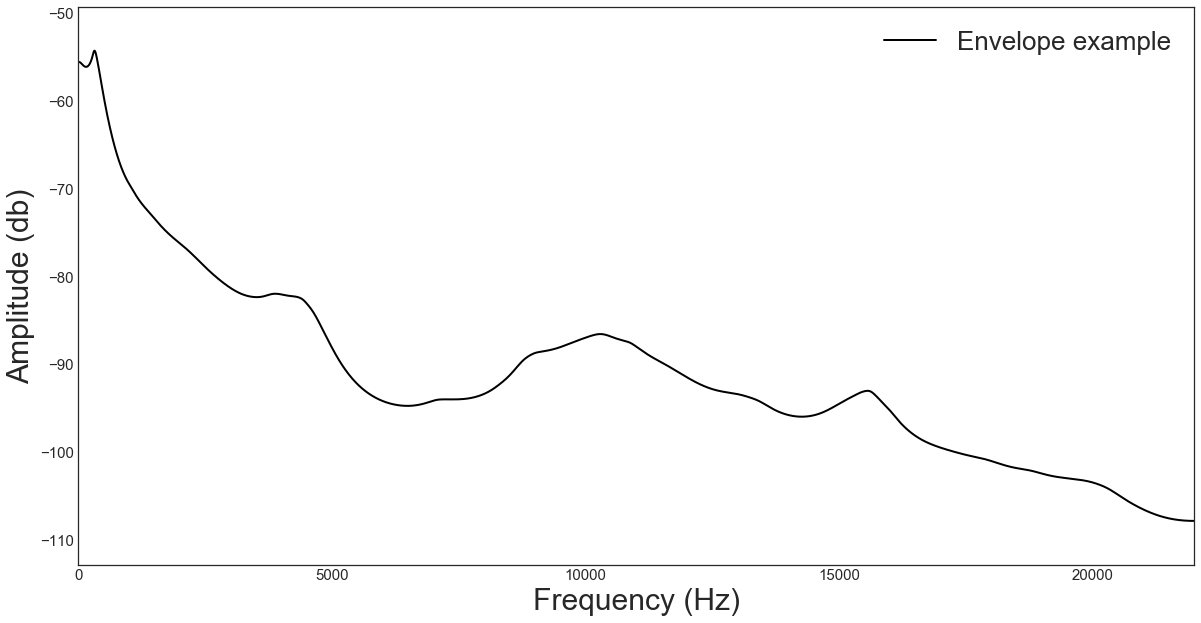

In [22]:
#or with less LPC coeficients
plot_mean_lpc_from_audio(audio_files = [file_name], label = ["Envelope example"], nb_coefs = 25)

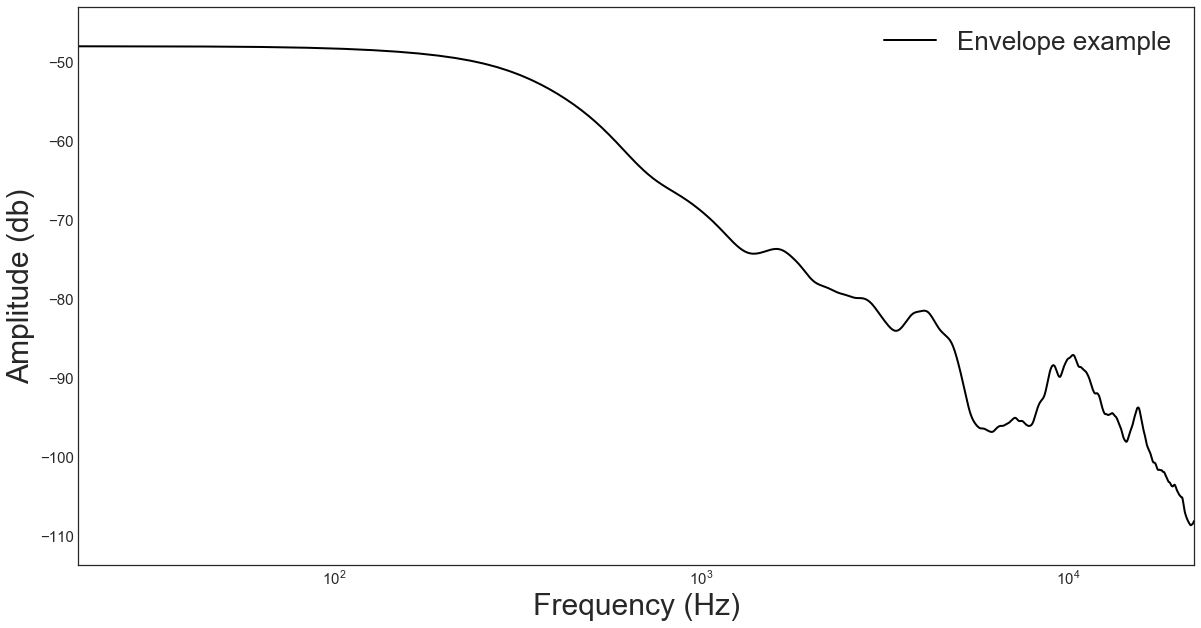

In [23]:
#Spectral envelopes
#True envelope
plot_mean_true_env_from_audio(audio_files = [file_name], label = ["Envelope example"] ,x_log = True)

or you can just compute the spectral envelope and plot it after ...

In [24]:
help(get_true_env_analysis)

Help on function get_true_env_analysis in module audio_analysis:

get_true_env_analysis(audio_file, analysis='', wait=True, f0='mean', destroy_sdif_after_analysis=True)
    Get mean true env data



In [25]:
spectral_env = get_true_env_analysis(audio_file = file_name)

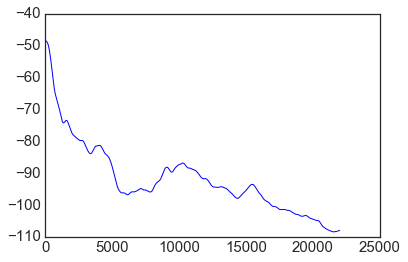

In [26]:
nb_points = len(spectral_env)
plt.plot(get_f(nb_points), spectral_env)

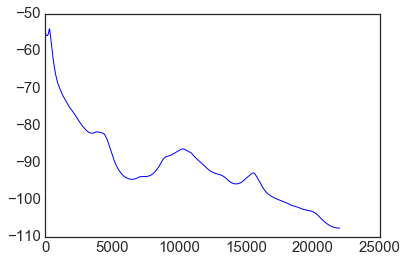

In [28]:
#Or with the LPC
spectral_env = get_mean_lpc_from_audio(audio = file_name, nb_coefs=25)
nb_points = len(spectral_env)
plt.plot(get_f(nb_points), spectral_env)

## Fundamental Freq estimation


In [29]:
help(get_f0)

Help on function get_f0 in module audio_analysis:

get_f0(audio_file, analysis='', wait=True, destroy_sdif_after_analysis=True)
    Get f0
        audio_file : file to analyse
    
    return : 
        f0times: time tags
        f0harm: signal harmonicity
        f0val: fundamental frequency estimation in Hz



In [30]:
f0times,f0harm,f0val = get_f0(audio_file=file_name)

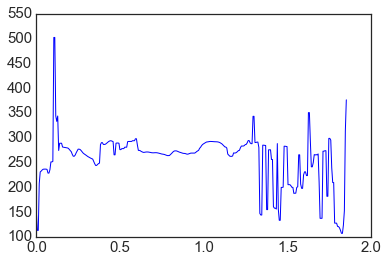

In [31]:
#fundamental frequency
plt.plot(f0times, f0val)

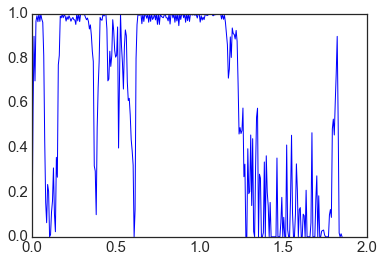

In [32]:
#haronicity
plt.plot(f0times, f0harm)